##Simple cluster- unsupervised

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
import os
import plotly.graph_objects as go

base_model = VGG16(weights='imagenet', include_top=False)

def extract_features(image_paths):
    features = []
    valid_image_paths = []
    for img_path in image_paths:
        if os.path.isfile(img_path) and img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img = Image.open(img_path).convert('L')
            img = img.resize((224, 224))
            img_array = img_to_array(img)
            img_array = np.repeat(img_array, 3, axis=-1)
            img_array = preprocess_input(img_array)
            img_array = np.expand_dims(img_array, axis=0)
            features.append(base_model.predict(img_array).flatten())
            valid_image_paths.append(img_path)
    return np.array(features), valid_image_paths

image_dir = '/content/Images/'
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
features, valid_image_paths = extract_features(image_paths)

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(features)

# Optional: Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Ensure that all arrays have the same length
if len(valid_image_paths) != len(reduced_features) or len(reduced_features) != len(cluster_labels):
    raise ValueError("Length mismatch between valid_image_paths, reduced_features, and cluster_labels")

# Create a DataFrame for visualization
import pandas as pd

data = pd.DataFrame({
    'Feature 1': reduced_features[:, 0],
    'Feature 2': reduced_features[:, 1],
    'Cluster': cluster_labels,
    'Image Path': valid_image_paths  # Use valid image paths
})

# Define colors for clusters
cluster_colors = {0: 'red', 1: 'blue'}  # You can extend this for more clusters

# Create an interactive scatter plot with image annotations using Plotly
fig = go.Figure()

for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    for index, row in cluster_data.iterrows():
        img_path = row['Image Path']
        img = load_img(img_path, target_size=(150, 150))
        fig.add_trace(go.Scatter(
            x=[row['Feature 1']],
            y=[row['Feature 2']],
            text=[f"Cluster: {cluster}<br>Image: {img_path}"],
            mode='markers+text',
            textposition="top center",
            showlegend=False,
            marker=dict(size=10, color=cluster_colors[cluster]),  # Use cluster-specific color
        ))

fig.update_layout(title="Cluster Visualization with Image Annotations")
fig.show()


1/1 [==============================] - 0s 23ms/step


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
import os
import plotly.graph_objects as go

base_model = VGG16(weights='imagenet', include_top=False)

def extract_features(image_paths):
    features = []
    valid_image_paths = []
    for img_path in image_paths:
        if os.path.isfile(img_path) and img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img = Image.open(img_path).convert('L')
            img = img.resize((224, 224))
            img_array = img_to_array(img)
            img_array = np.repeat(img_array, 3, axis=-1)
            img_array = preprocess_input(img_array)
            img_array = np.expand_dims(img_array, axis=0)
            features.append(base_model.predict(img_array).flatten())
            valid_image_paths.append(img_path)
    return np.array(features), valid_image_paths

image_dir = '/content/Images/'
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
features, valid_image_paths = extract_features(image_paths)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(features)


pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)


if len(valid_image_paths) != len(reduced_features) or len(reduced_features) != len(cluster_labels):
    raise ValueError("Length mismatch between valid_image_paths, reduced_features, and cluster_labels")


import pandas as pd

data = pd.DataFrame({
    'Feature 1': reduced_features[:, 0],
    'Feature 2': reduced_features[:, 1],
    'Cluster': cluster_labels,
    'Image Path': valid_image_paths
})

cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'black'}

fig = go.Figure()

for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    for index, row in cluster_data.iterrows():
        img_path = row['Image Path']
        img = load_img(img_path, target_size=(150, 150))
        fig.add_trace(go.Scatter(
            x=[row['Feature 1']],
            y=[row['Feature 2']],
            #text=[f"Cluster: {cluster}<br>Image: {img_path}"],
            mode='markers+text',
            textposition="top center",
            showlegend=False,
            marker=dict(size=10, color=cluster_colors[cluster]),
        ))

fig.update_layout(title="Cluster Visualization with Image Annotations")
fig.show()


1/1 [==============================] - 0s 19ms/step


In [ ]:
!pip install -q kaggle
from google.colab import files

In [ ]:
!pip install kaggle --quiet
from google.colab import filesa
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download paultimothymooney/breast-histopathology-images
from google.colab import drive
!unzip "/content/breast-histopathology-images.zip" -d kaggle_data
drive.flush_and_unmount()

Streaming output truncated to the last 5000 lines.
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: kaggle_data/IDC_regular_ps50_idx5/9346/0/9346_

In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import cv2

In [ ]:
data = '/content/kaggle_data/10253'
No_breast_cancer = '/content/kaggle_data/10253/0'
Yes_breast_cancer = '/content/kaggle_data/10253/1'

In [ ]:
dirlist=[No_breast_cancer, Yes_breast_cancer]
classes=['0', '1']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  549    labels:  549


In [ ]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(549,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,/content/kaggle_data/10253/0/10253_idx5_x1251_...,0
1,/content/kaggle_data/10253/0/10253_idx5_x2301_...,0
2,/content/kaggle_data/10253/0/10253_idx5_x2001_...,0
3,/content/kaggle_data/10253/0/10253_idx5_x2501_...,0
4,/content/kaggle_data/10253/0/10253_idx5_x1401_...,0


In [ ]:
print(df['labels'].value_counts())

0    479
1     70
Name: labels, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.95, random_state=0)
train_new, valid = train_test_split(train, train_size=0.90, random_state=0)

print(f"train set shape: {train_new.shape}")
print(f"test set shape: {test.shape}")
print(f"validation set shape: {valid.shape}")

train set shape: (468, 2)
test set shape: (28, 2)
validation set shape: (53, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_new,
                                              x_col = 'filepaths', y_col ='labels',
                                              target_size = (224,224), batch_size = 32,
                                              class_mode = 'binary', shuffle = True)
val_gen = train_datagen.flow_from_dataframe(valid,
                                            target_size=(224,224), x_col = 'filepaths', y_col ='labels',
                                            class_mode='binary',
                                            batch_size= 16, shuffle=True)
test_gen = test_datagen.flow_from_dataframe(test,
                                            target_size = (224,224), x_col = 'filepaths', y_col ='labels',
                                             class_mode = 'binary',
                                            batch_size = 16, shuffle = False)

Found 468 validated image filenames belonging to 2 classes.
Found 53 validated image filenames belonging to 2 classes.
Found 28 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow import keras
base_model = keras.applications.ResNet50V2(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False,
)


base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))


x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint("Tumor_classifier_model.h5", save_best_only=True, verbose = 0)]
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(train_gen, validation_data = val_gen, epochs = 100, callbacks = [callbacks], verbose = 1)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.5950 - accuracy: 0.6859

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 31s 614ms/step - loss: 0.5950 - accuracy: 0.6859 - val_loss: 0.5464 - val_accuracy: 0.7547
Epoch 2/100
15/15 [==============================] - 8s 568ms/step - loss: 0.4921 - accuracy: 0.8184 - val_loss: 0.4894 - val_accuracy: 0.8491
Epoch 3/100
15/15 [==============================] - 7s 499ms/step - loss: 0.4359 - accuracy: 0.8397 - val_loss: 0.4677 - val_accuracy: 0.8491
Epoch 4/100
15/15 [==============================] - 6s 422ms/step - loss: 0.3981 - accuracy: 0.8718 - val_loss: 0.4787 - val_accuracy: 0.8491
Epoch 5/100
15/15 [==============================] - 8s 567ms/step - loss: 0.3903 - accuracy: 0.8718 - val_loss: 0.4530 - val_accuracy: 0.8491
Epoch 6/100
15/15 [==============================] - 6s 420ms/step - loss: 0.3745 - accuracy: 0.8782 - val_loss: 0.4536 - val_accuracy: 0.8491
Epoch 7/100
15/15 [==============================] - 8s 570ms/step - loss: 0.3665 - accuracy: 0.8782 - val_loss: 0.3878 - val_accuracy: 0.8491
Epoch 8/10

In [ ]:
model.save("model.h5")

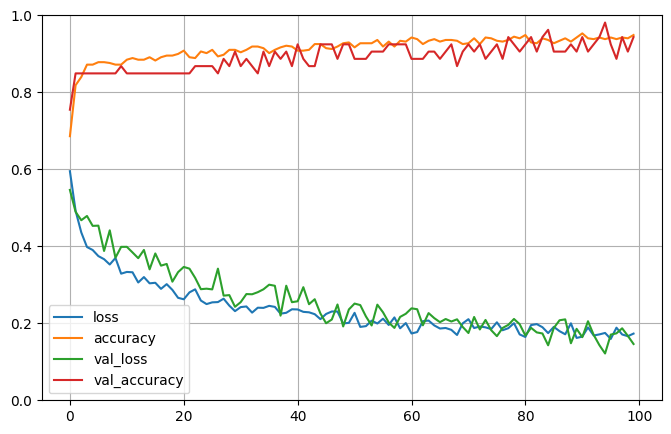

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
import os
import glob
from PIL import Image
import cv2
import tensorflow as tf

model_path = "/content/model.h5"
loaded_model = tf.keras.models.load_model(model_path)
image_paths = glob.glob("/content/Images/*.jpg")


for image_path in image_paths:
    image = cv2.imread(image_path)

    if image is not None:
        image_name = os.path.basename(image_path)

        image_fromarray = Image.fromarray(image, 'RGB')

        resize_image = image_fromarray.resize((224, 224))
        expand_input = np.expand_dims(resize_image, axis=0)

        input_data = np.array(expand_input) / 255
        pred = loaded_model.predict(input_data)

        if pred >= 0.5:
            print("Image name: {} - Yes".format(image_name))
        else:
            print("Image name: {} - No".format(image_name))


1/1 [==============================] - 2s 2s/step
Image name: IMG_20230825_124020.jpg - No
1/1 [==============================] - 0s 27ms/step
Image name: IMG_20230715_121213.jpg - No
1/1 [==============================] - 0s 27ms/step
Image name: IMG_20230815_142842.jpg - No
1/1 [==============================] - 0s 22ms/step
Image name: IMG_20230725_135037.jpg - No
1/1 [==============================] - 0s 24ms/step
Image name: IMG_20230825_123342.jpg - No
1/1 [==============================] - 0s 23ms/step
Image name: IMG_20230825_123805.jpg - No
1/1 [==============================] - 0s 24ms/step
Image name: IMG_20230825_123559.jpg - No
1/1 [==============================] - 0s 22ms/step
Image name: IMG_20230808_124009.jpg - No
1/1 [==============================] - 0s 33ms/step
Image name: IMG_20230825_123456.jpg - No
1/1 [==============================] - 0s 32ms/step
Image name: IMG_20230825_123534.jpg - No
1/1 [==============================] - 0s 33ms/step
Image name: IMG_2023

####Hence none is breast cancer